In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from models import Paths


In [4]:
df = pd.read_csv(Paths.CLEAN / "combined-data.csv")

df.head()


,Country,1970_co2_total,1971_co2_total,1972_co2_total,1973_co2_total,1974_co2_total,1975_co2_total,1976_co2_total,1977_co2_total,1978_co2_total,...,2012_surface_temperature,2013_surface_temperature,2014_surface_temperature,2015_surface_temperature,2016_surface_temperature,2017_surface_temperature,2018_surface_temperature,2019_surface_temperature,2020_surface_temperature,2021_surface_temperature
0,Angola,8.952570,8.538308,10.388519,11.372301,11.833761,10.930423,7.317385,12.057774,14.239234,...,0.552,1.044,0.828,1.331,1.609,0.870,1.395,1.752,1.162,1.553
1,Anguilla,0.002168,0.002168,0.002264,0.002109,0.002350,0.002584,0.002434,0.002537,0.002902,...,0.640,0.770,0.814,1.051,1.125,0.960,0.664,0.843,1.224,0.893
2,Albania,4.814516,4.814828,5.498804,4.939869,5.319746,5.414438,5.785733,6.197670,6.820001,...,1.487,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536
3,United Arab Emirates,19.437564,25.404108,27.718761,35.806205,35.971039,36.642262,45.538708,45.835847,52.580154,...,1.086,0.739,0.909,1.556,1.059,1.632,1.498,1.204,1.210,1.699
4,Argentina,88.321009,88.765100,90.716408,93.698462,93.987211,91.411464,96.029610,100.067600,99.336340,...,0.798,0.442,0.951,0.957,0.488,1.095,0.878,0.760,1.123,1.031


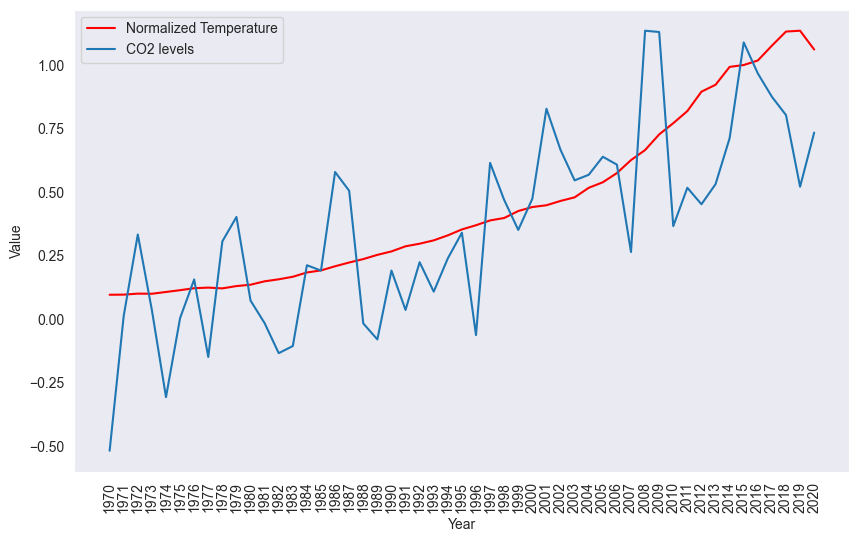

In [5]:
selected_country = 'India'

country = df.loc[df['Country'] == selected_country]
years = df.columns[1:52].str.split('_').str[0].astype(int)

temp_data = country.iloc[0][1:52].astype(float)
co2_data = country.iloc[0][54:].astype(float)

max_co2 = max(co2_data)
normalized_temp_data = [temp * max_co2 / max(temp_data) for temp in temp_data]

plt.figure(figsize=(10, 6))
plt.plot(years, normalized_temp_data, color='red', label='Normalized Temperature')
plt.plot(years, co2_data, label='CO2 levels')
plt.xlabel('Year')
plt.ylabel('Value')
plt.xticks(years, rotation=90)
plt.legend()
plt.grid()
plt.show()


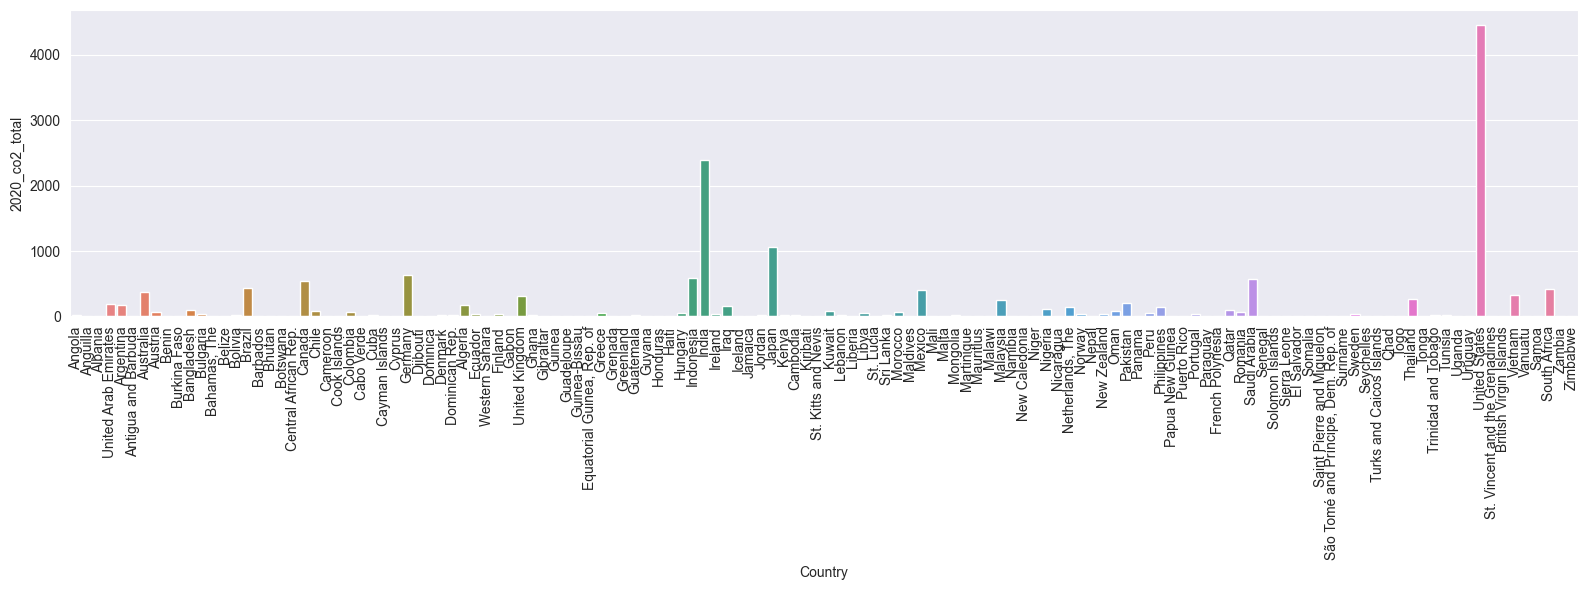

In [6]:
year = 2020
countries = df['Country']
levels = df[f"{year}_co2_total"]
plt.figure(figsize=(16, 6))
sns.barplot(x=countries, y=levels, hue=countries)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [7]:
year = 2021

co2_column_name = f"{year}_co2_total"

temp_column_name = f"{year}_surface_temperature"

co2_max = df[df[co2_column_name] == df[co2_column_name].max()]
temp_max = df[df[temp_column_name] == df[temp_column_name].max()]

co2_country_max = co2_max['Country'].values[0]
temp_country_max = temp_max['Country'].values[0]

print(f'max co2 levels in {year}: {co2_max[co2_column_name].values[0]}\n  country: {co2_country_max}')
print(f'max surface temperature in {year}: {temp_max[temp_column_name].values[0]}\n  country: {temp_country_max}')


max co2 levels in 2021: 4752.07932
 country: United States
max surface temperature in 2021: 2.676
 country: Kuwait


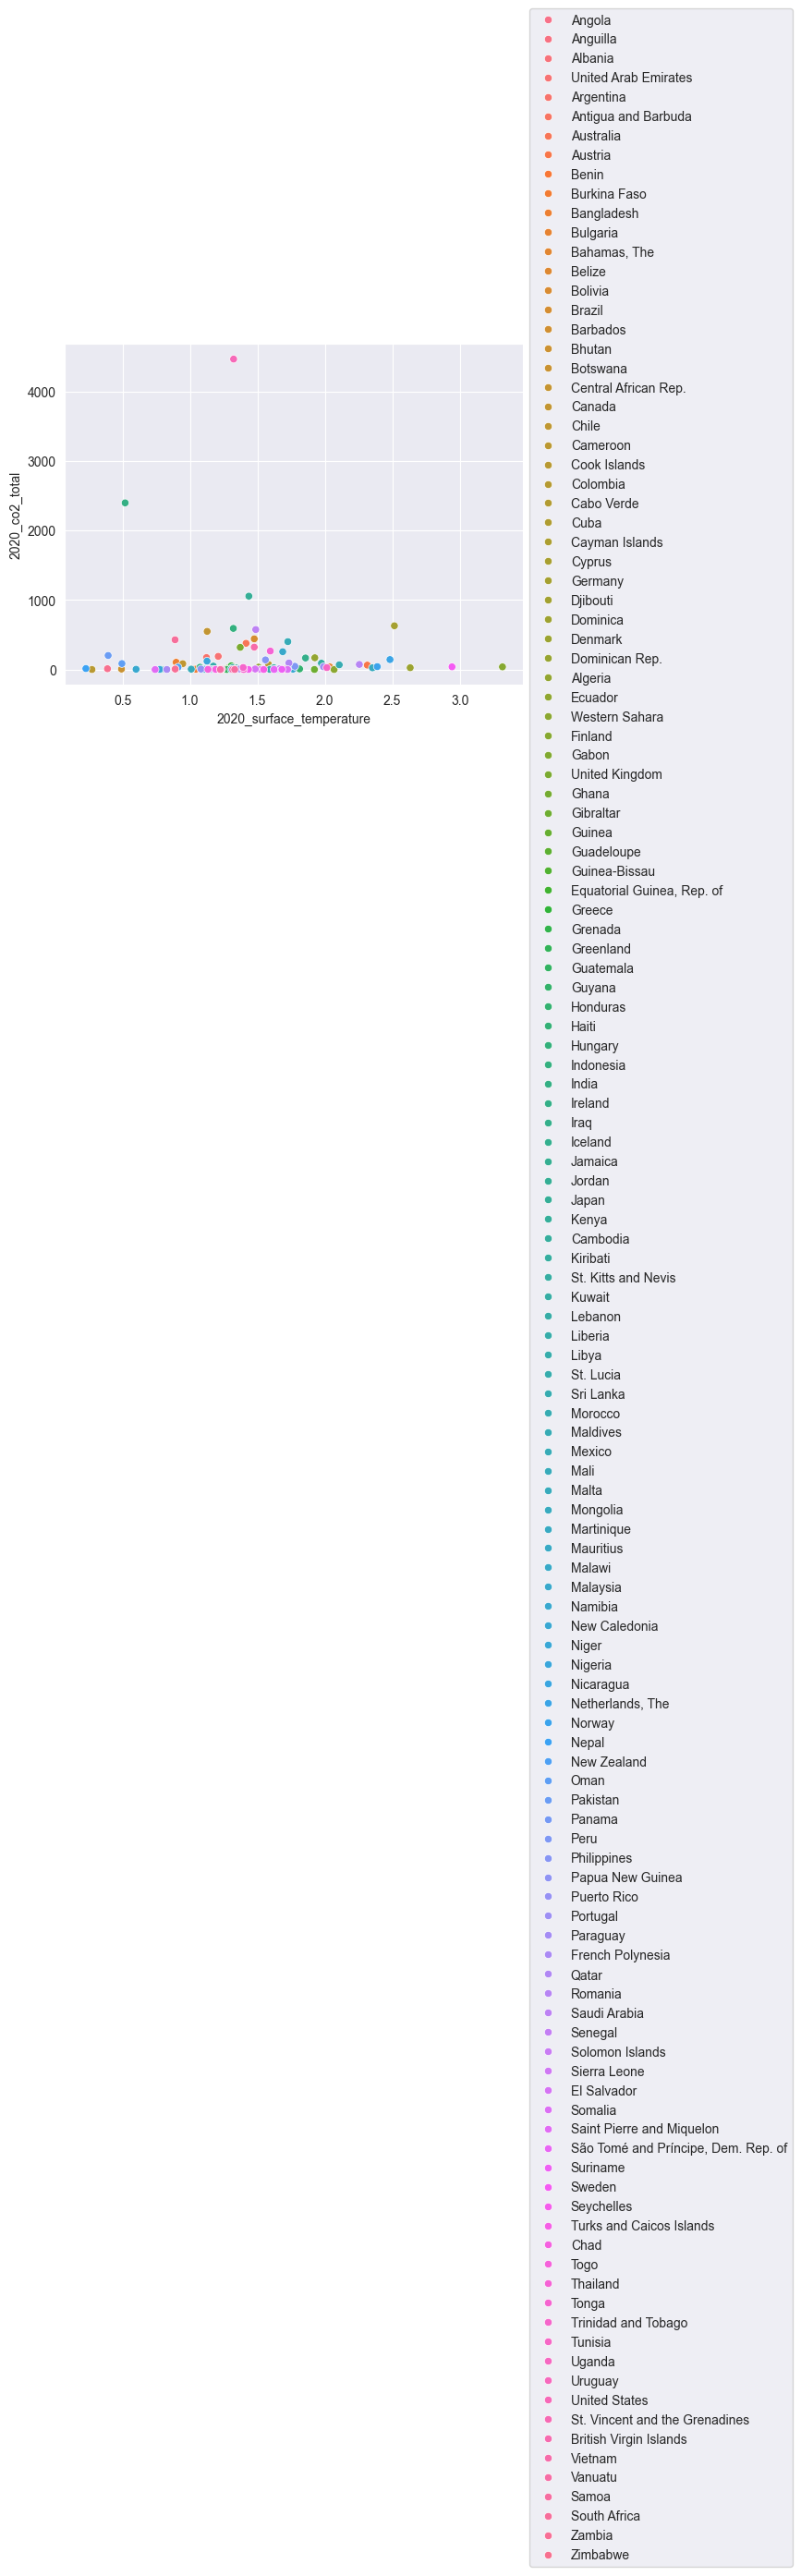

In [8]:
year = 2020

sns.scatterplot(data=df, y=f"{year}_co2_total", x=f"{year}_surface_temperature", hue="Country")

# plt.figure(figsize=(12, 6))

plt.legend(bbox_to_anchor=(1, 2), loc='upper left')

plt.show()
